In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read data & create dataframe
data = pd.read_csv('task.csv')
df = pd.DataFrame(data)
# get rid of products 'B' and 'C'
df = df[~df['product'].isin(['B','C'])]
df

,campaign_id,month,product,impressions,clicks,conversion_rate,campaign type,CPL,EPL
0,1,8/1/2014,A,9004,920,"0,6522%",SOS,85,68
1,2,8/1/2014,A,3956,1955,"0,6138%",SOS,48,76
2,3,8/1/2014,A,1913,1964,"0,3055%",SOS,56,146
3,4,8/1/2014,A,8411,1087,"1,4719%",SOS,61,77
4,5,8/1/2014,A,722,2440,"0,6148%",SOS,52,95
...,...,...,...,...,...,...,...,...,...
330,331,5/1/2015,A,8955,1679,"0,7147%",CPM,46,100
331,332,5/1/2015,A,14217,1995,"0,5013%",SOS,54,127
332,333,5/1/2015,A,2399,1516,"0,5937%",SOS,70,138
333,334,5/1/2015,A,4525,1622,"0,7398%",SOS,67,112


In [2]:
# create profit column
df['profit'] = df['EPL'] - df['CPL']

In [3]:
# fix the conversion_rate column so it's eligible to be changed to float
df['conversion_rate'] = df['conversion_rate'].str.replace(',', '.')
df['conversion_rate'] = df['conversion_rate'].str.replace('%', '')
df['conversion_rate'] = df['conversion_rate'].astype(float)

In [4]:
# group the data to find average conversion rate per month
avg_cr = df.groupby(['month', 'campaign type'])['conversion_rate'].mean().reset_index()

In [5]:
# pivot the data
pivot_cr = avg_cr.pivot(index='month', columns='campaign type', values='conversion_rate')
pivot_cr

campaign type,CPA,CPM,SOS
month,,,
1/1/2015,0.574175,0.338200,0.701604
10/1/2014,0.561500,0.701825,0.661069
11/1/2014,1.165767,0.482650,0.753367
12/1/2014,2.101800,0.459000,0.853457
2/1/2015,0.729633,0.698633,0.715258
3/1/2015,0.466633,0.559075,0.678183
4/1/2015,1.255650,0.685367,0.744250
5/1/2015,0.613217,0.586650,0.654652
8/1/2014,0.660225,0.417100,0.627060


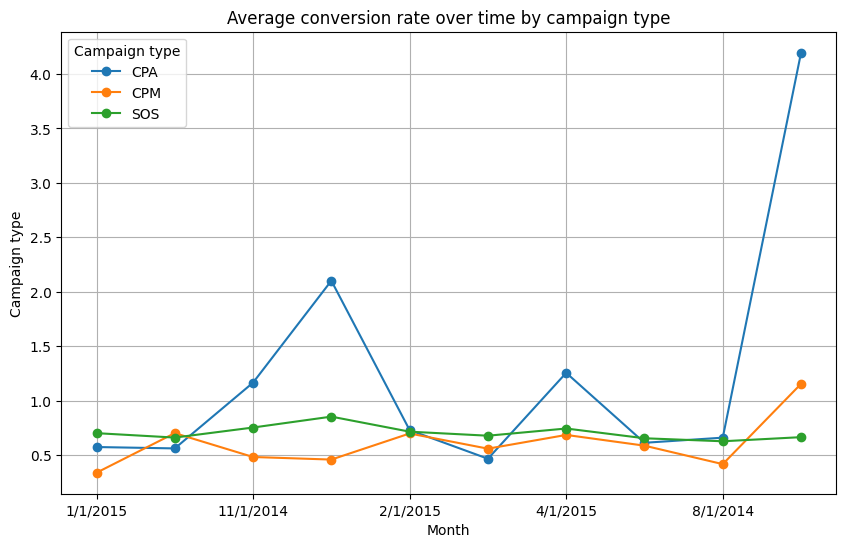

In [6]:
# create a time series chart to display average conversion rate by campaign type over the given timespan
pivot_cr.plot(figsize=(10,6), marker='o', title='Average conversion rate over time by campaign type')
plt.xlabel('Month')
plt.ylabel('Campaign type')
plt.grid(True)
plt.legend(title='Campaign type')
plt.show()

In [7]:
# calculate average conversion rate for every campaign type - over the whole timespan, not by month as above
average_cr_overall = df.groupby('campaign type')['conversion_rate'].mean()
average_cr_overall

campaign type
CPA    1.147319
CPM    0.611040
SOS    0.704785
Name: conversion_rate, dtype: float64

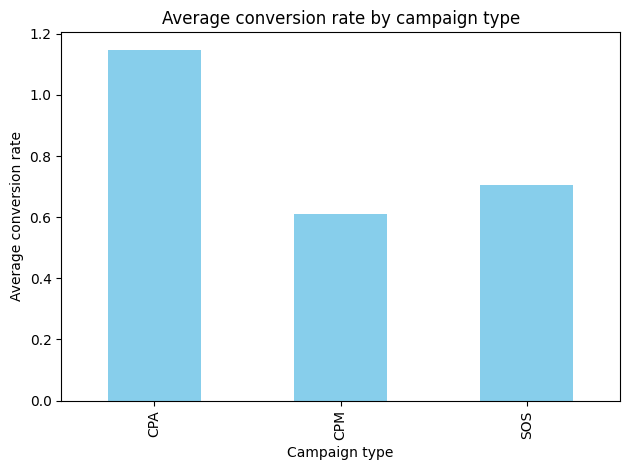

In [8]:
# create a bar chart to display the average conversion rate by campaign type overall
fig, ax = plt.subplots()

average_cr_overall.plot(kind='bar', ax=ax, color='skyblue')

ax.set_xlabel('Campaign type')
ax.set_ylabel('Average conversion rate')
ax.set_title('Average conversion rate by campaign type')
plt.tight_layout()
plt.show()

In [9]:
# moving on from cr to profit, group the data by campaign and month, and calculate the total profit generated by campaign type in a given month
profit_per_month = df.groupby(['month', 'campaign type']).agg({'profit':'sum'}).reset_index()

In [10]:
# pivot the data to reach more readable format
pivot_profit = profit_per_month.pivot(index='month', columns='campaign type', values='profit')
pivot_profit

campaign type,CPA,CPM,SOS
month,,,
1/1/2015,254,101,1961
10/1/2014,193,359,1960
11/1/2014,187,331,1901
12/1/2014,136,208,2220
2/1/2015,299,265,1906
3/1/2015,320,328,2264
4/1/2015,345,265,2135
5/1/2015,489,228,2746
8/1/2014,265,177,1671


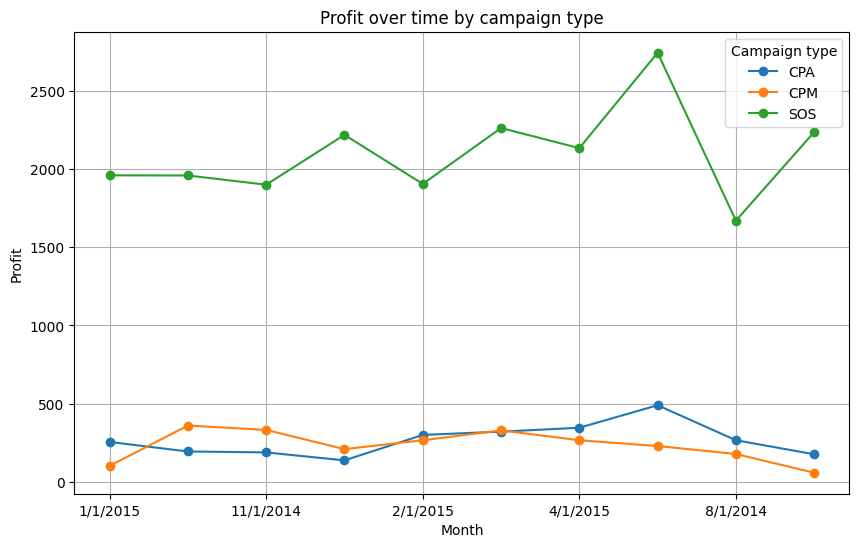

In [11]:
# create a time series chart to visualize how profit behaves every month for each campaign type
pivot_profit.plot(figsize=(10,6), marker='o', title='Profit over time by campaign type')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.legend(title='Campaign type')
plt.show()

## As far as profit goes, SOS campaigns are on a whole different level

In [12]:
# calculate the whole profit
total_profit = df.groupby('campaign type')['profit'].sum()
total_profit

campaign type
CPA     2663
CPM     2319
SOS    21002
Name: profit, dtype: int64

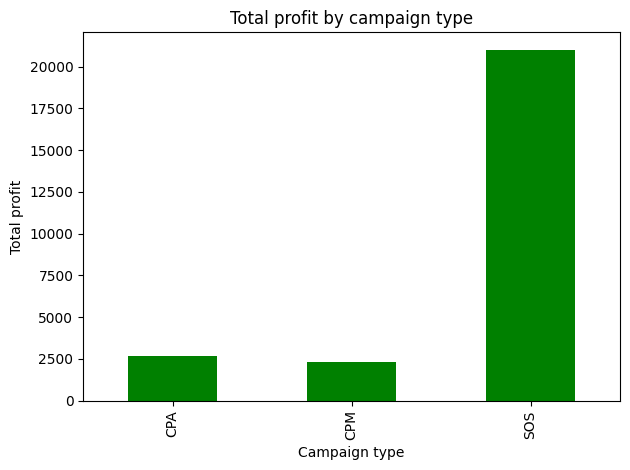

In [13]:
# plot the whole profit with bar chart
fig, ax = plt.subplots()

total_profit.plot(kind='bar', ax=ax, color='green')

ax.set_xlabel('Campaign type')
ax.set_ylabel('Total profit')
ax.set_title('Total profit by campaign type')
plt.tight_layout()
plt.show()

## Even though CPA campaigns performed much better in terms of conversion rate, with average conversion rate 64.29% higher than SOS campaigns, the SOS campaigns have generated much more - over 688% more profit than CPA and over 320% more profit than CPA and CPM combined, I think SOS is the most suitable campaign type for product "A"